In [2]:
import pymysql
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Database connection
user = '<user>'
password = '<password>'
host = 'localhost'
port = 3306
database = '<db>'

# Establish connection
connection = pymysql.connect(
    host=host,
    port=port,
    user=user,
    password=password,
    database=database
)

# Function to load data from a table
def load_data_from_db(connection, table_name):
    query = f"SELECT * FROM {table_name}"
    return pd.read_sql(query, connection)

# Load training and testing data
training_data = load_data_from_db(connection, 'training_data')
testing_data = load_data_from_db(connection, 'testing_data')

# Close the connection
connection.close()

C:\Users\kevin\AppData\Local\Temp\ipykernel_20808\159293122.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(query, connection)


In [9]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 42 columns):
 #   Column                        Non-Null Count  Dtype          
---  ------                        --------------  -----          
 0   home                          22 non-null     int64          
 1   away                          22 non-null     int64          
 2   home_win_probability          22 non-null     float64        
 3   draw_probability              22 non-null     float64        
 4   away_win_probability          22 non-null     float64        
 5   team_to_win_prediction        22 non-null     int64          
 6   average_goals_prediction      22 non-null     float64        
 7   weather_in_degrees            22 non-null     object         
 8   odds                          22 non-null     float64        
 9   full_time_score               22 non-null     object         
 10  score_at_halftime             22 non-null     object         
 11  date                 

In [ ]:
testing_data.info()

In [ ]:
# Bivariate Analysis
# Exclude non-numeric columns
numeric_data = training_data.select_dtypes(include=['float64', 'int64'])

In [27]:
numeric_data.corr()["prediction_result"].sort_values(ascending=False)



prediction_result               1.000000
home_team_gf                    0.449060
home_team_wins                  0.435984
home_team_points                0.412715
away_team_gf                    0.369382
away_team_full_time_score       0.345712
home_team_full_time_score       0.294496
home_team_score_prediction      0.234985
away_team_points                0.229669
away                            0.225753
away_team_halftime_score        0.211119
average_goals_prediction        0.194663
away_team_wins                  0.182508
home_win_probability            0.182202
home_team_halftime_score        0.180097
away_team_ppg_last_5_matches    0.173766
weekly_round                    0.160357
away_team_score_prediction      0.137607
home_team_ppg_last_5_matches    0.128311
away_team_draws                 0.121471
day_of_week                     0.102229
home                            0.091139
away_win_probability            0.009699
away_team_matches_played       -0.006393
home_team_matche

In [31]:
# List of significant features
significant_features = [
    'home_team_gf', 'home_team_wins', 'home_team_points', 'away_team_gf',
    'away_team_full_time_score', 'home_team_full_time_score', 'home_team_score_prediction',
    'away_team_points', 'away', 'away_team_halftime_score', 'average_goals_prediction',
    'away_team_wins', 'away_team_pos', 'away_team_losses', 'home_team_draws',
    'team_to_win_prediction', 'home_team_ga', 'home_team_losses', 'home_team_pos',
    'draw_probability', 'odds'
]

# Create a new DataFrame with significant features
significant_df = training_data[significant_features].copy()

In [34]:
significant_df.head()

,home_team_gf,home_team_wins,home_team_points,away_team_gf,away_team_full_time_score,home_team_full_time_score,home_team_score_prediction,away_team_points,away,away_team_halftime_score,...,away_team_wins,away_team_pos,away_team_losses,home_team_draws,team_to_win_prediction,home_team_ga,home_team_losses,home_team_pos,draw_probability,odds
0,78,17,56,88,1,0,1,83,1,1,...,26,1,5,5,1,56,13,6,23.0,1.40
1,51,12,44,87,4,0,1,82,13,1,...,25,2,3,8,1,55,16,13,19.0,1.25
2,69,18,60,87,2,0,1,82,13,0,...,25,2,3,6,1,58,11,5,23.0,1.33
3,73,20,67,81,3,3,2,78,12,2,...,23,3,4,7,2,53,9,4,37.0,4.20
4,78,17,56,70,2,3,2,54,15,0,...,15,7,11,5,0,56,13,6,32.0,2.63


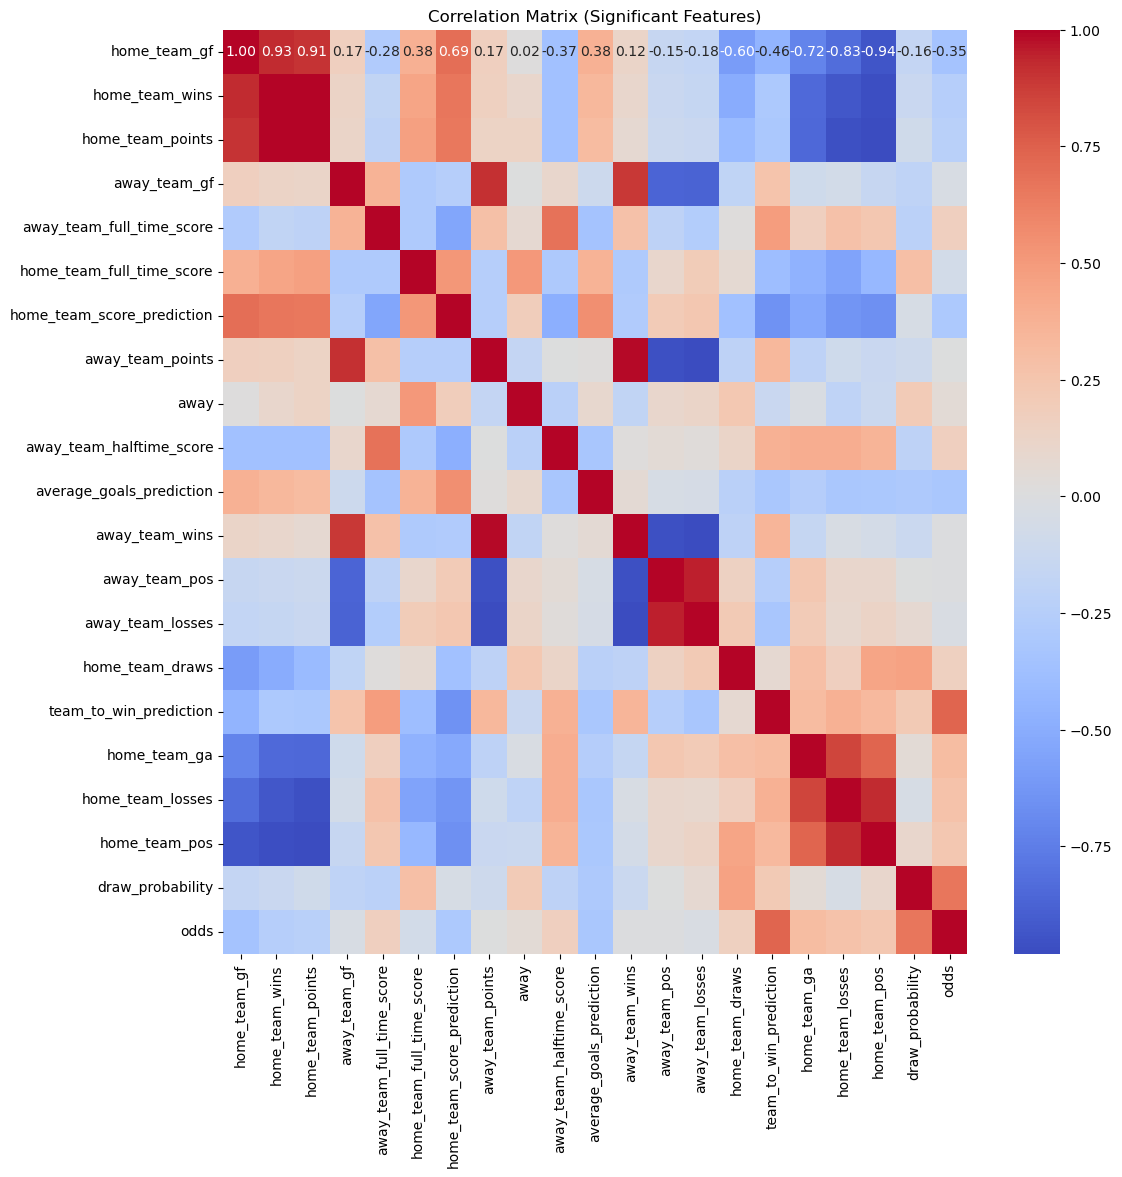

In [35]:
significant_corr = significant_df.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 12))
sns.heatmap(significant_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (Significant Features)')
plt.show()

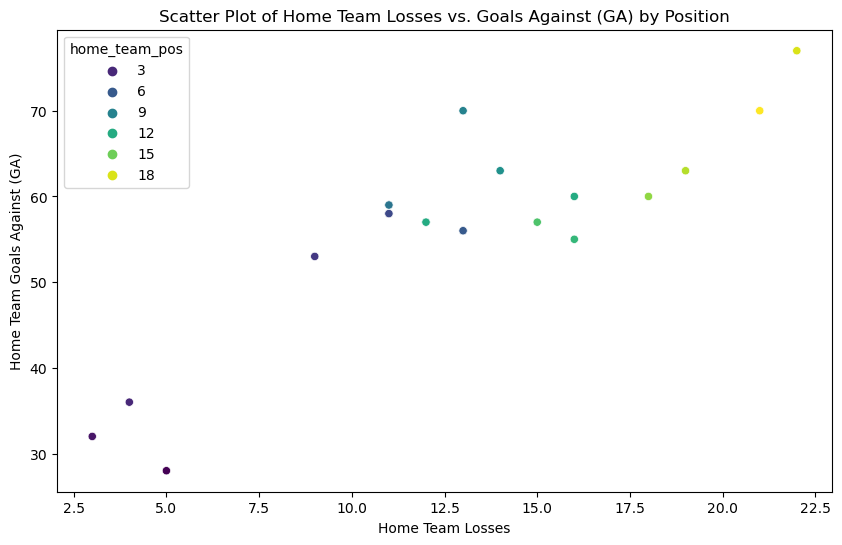

In [36]:
# Scatter plot involving 'home_team_losses', 'home_team_ga', and 'home_team_pos'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='home_team_losses', y='home_team_ga', hue='home_team_pos', data=significant_df, palette='viridis')
plt.title('Scatter Plot of Home Team Losses vs. Goals Against (GA) by Position')
plt.xlabel('Home Team Losses')
plt.ylabel('Home Team Goals Against (GA)')
plt.show()


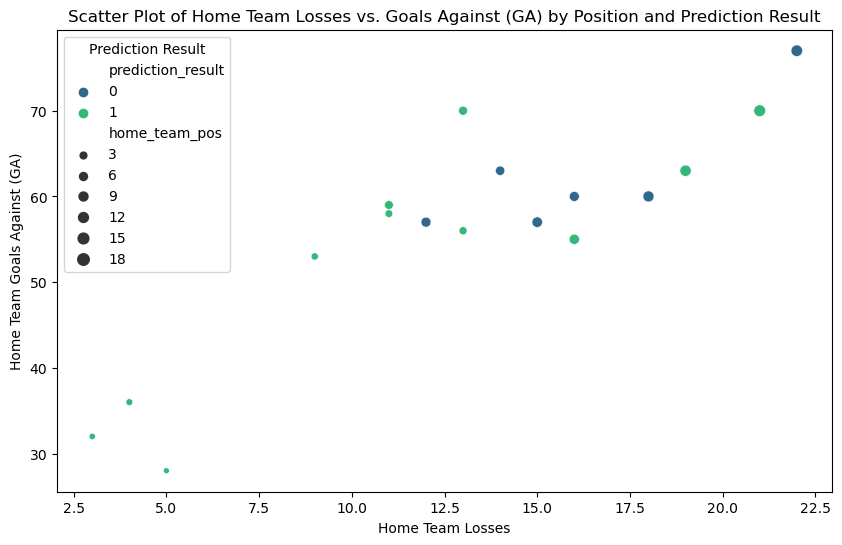

In [38]:
# Scatter plot involving 'home_team_losses', 'home_team_ga', 'home_team_pos', and 'prediction_result'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='home_team_losses', y='home_team_ga', hue='prediction_result', size='home_team_pos', data=training_data, palette='viridis')
plt.title('Scatter Plot of Home Team Losses vs. Goals Against (GA) by Position and Prediction Result')
plt.xlabel('Home Team Losses')
plt.ylabel('Home Team Goals Against (GA)')
plt.legend(title='Prediction Result')
plt.show()


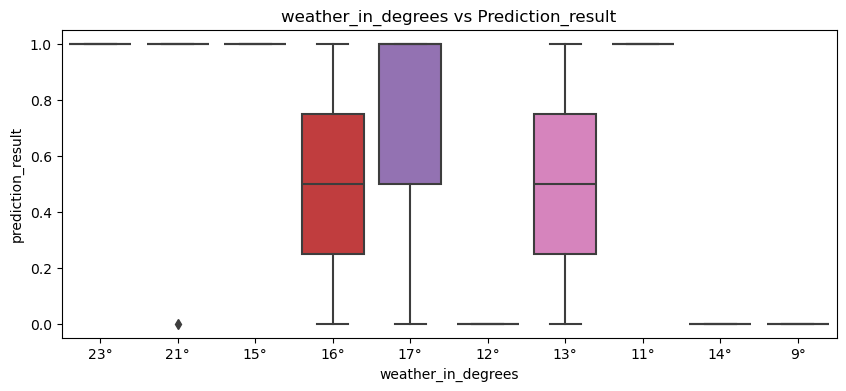

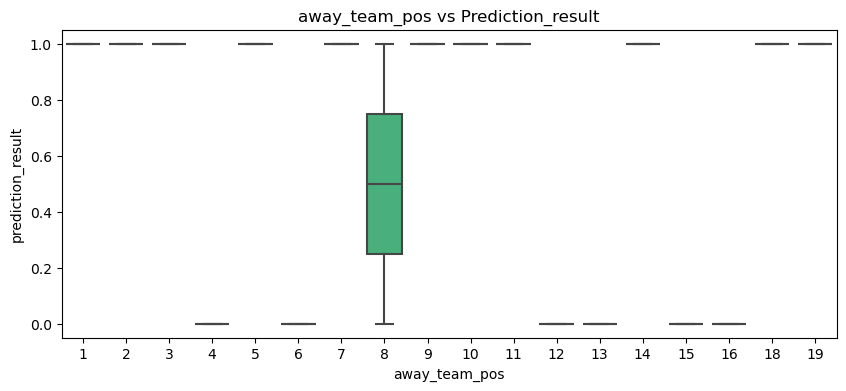

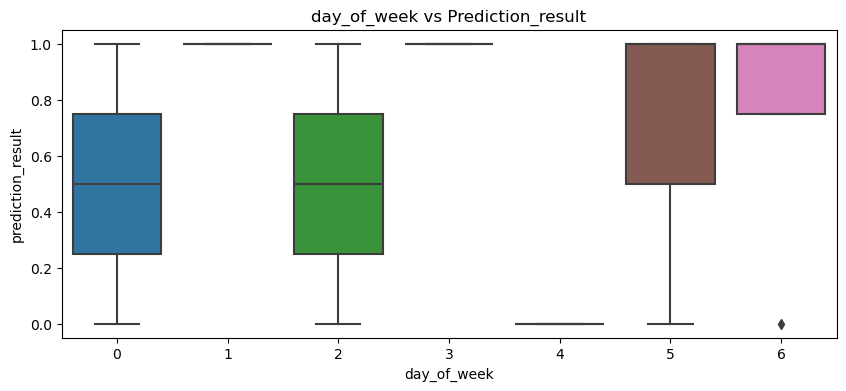

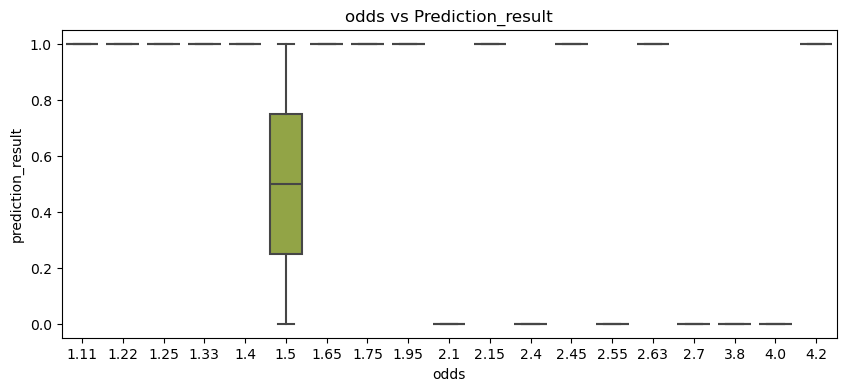

In [22]:
# Box plots for categorical features
categorical_features = ['weather_in_degrees', 'away_team_pos', 'day_of_week','odds']
for feature in categorical_features:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=feature, y='prediction_result', data=training_data)
    plt.title(f'{feature} vs Prediction_result')
    plt.show()



C:\Users\kevin\anaconda3\envs\Alx_DataScience_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kevin\anaconda3\envs\Alx_DataScience_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


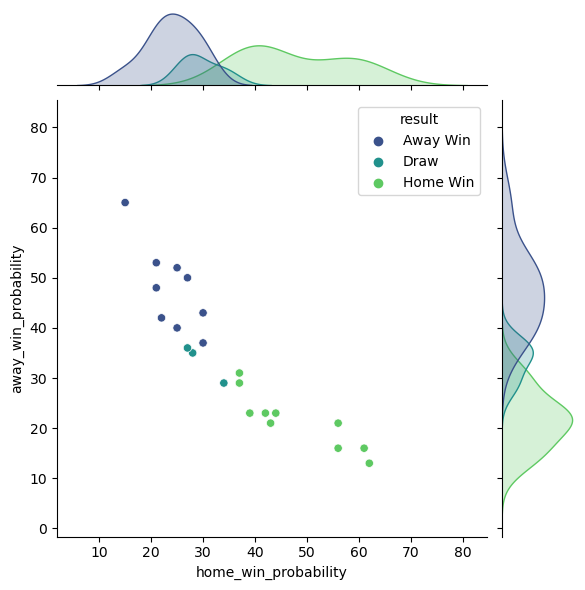

In [8]:
# Create a new column 'result' based on the highest probability
def result(row):
    if row['home_win_probability'] > row['draw_probability'] and row['home_win_probability'] > row['away_win_probability']:
        return 'Home Win'
    elif row['draw_probability'] > row['home_win_probability'] and row['draw_probability'] > row['away_win_probability']:
        return 'Draw'
    else:
        return 'Away Win'

training_data['result'] = training_data.apply(result, axis=1)

# Plot using seaborn.jointplot
sns.jointplot(
    data=training_data,
    x='home_win_probability',
    y='away_win_probability',
    hue='result',
    kind='scatter',
    palette='viridis'
)

# Show plot
plt.show()


C:\Users\kevin\anaconda3\envs\Alx_DataScience_env\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
C:\Users\kevin\anaconda3\envs\Alx_DataScience_env\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
C:\Users\kevin\anaconda3\envs\Alx_DataScience_env\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
C:\Users\kevin\anaconda3\envs\Alx_DataScience_env\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
C:\Users\kevin\anaconda3\envs\Alx_DataScience_env\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_a

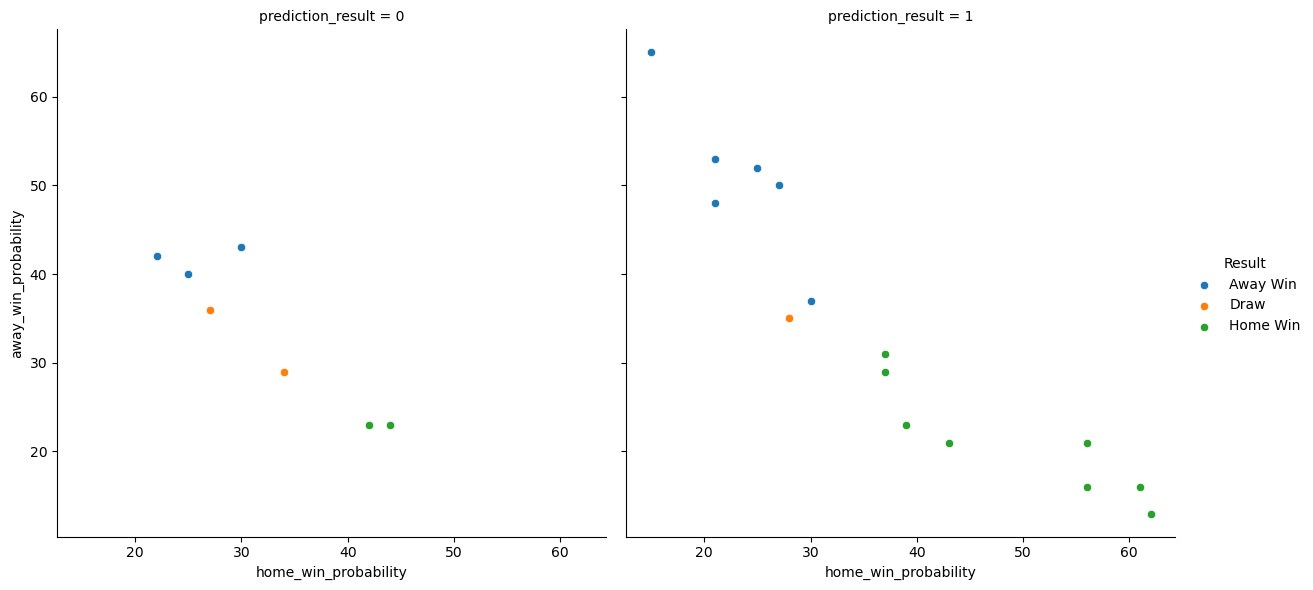

In [46]:
# Create a new column 'result' based on the highest probability
def result(row):
    if row['home_win_probability'] > row['draw_probability'] and row['home_win_probability'] > row['away_win_probability']:
        return 'Home Win'
    elif row['draw_probability'] > row['home_win_probability'] and row['draw_probability'] > row['away_win_probability']:
        return 'Draw'
    else:
        return 'Away Win'

training_data['result'] = training_data.apply(result, axis=1)


# Create a FacetGrid and plot joint plots for each prediction result
g = sns.FacetGrid(training_data, col="prediction_result", hue="result", height=6)
g.map(sns.scatterplot, "home_win_probability", "away_win_probability", palette='viridis')
g.add_legend(title='Result')
plt.show()


C:\Users\kevin\anaconda3\envs\Alx_DataScience_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


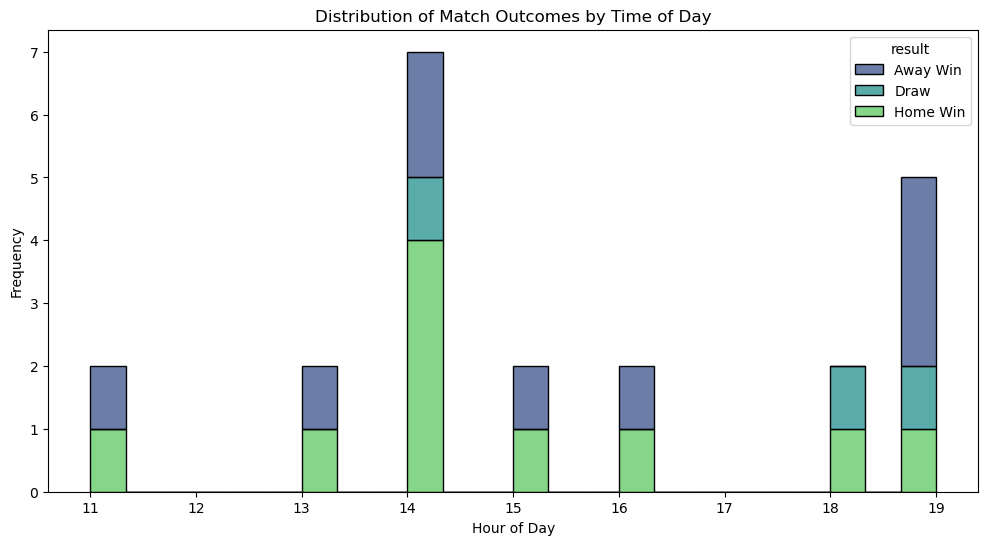

In [12]:
# Create a new column 'result' based on the highest probability
def result(row):
    if row['home_win_probability'] > row['draw_probability'] and row['home_win_probability'] > row['away_win_probability']:
        return 'Home Win'
    elif row['draw_probability'] > row['home_win_probability'] and row['draw_probability'] > row['away_win_probability']:
        return 'Draw'
    else:
        return 'Away Win'

training_data['result'] = training_data.apply(result, axis=1)

# Plot the distribution of match outcomes by time
plt.figure(figsize=(12, 6))
sns.histplot(data=training_data, x='hour', hue='result', multiple='stack', bins=24, palette='viridis')
plt.title('Distribution of Match Outcomes by Time of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Frequency')
plt.show()


C:\Users\kevin\anaconda3\envs\Alx_DataScience_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kevin\anaconda3\envs\Alx_DataScience_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


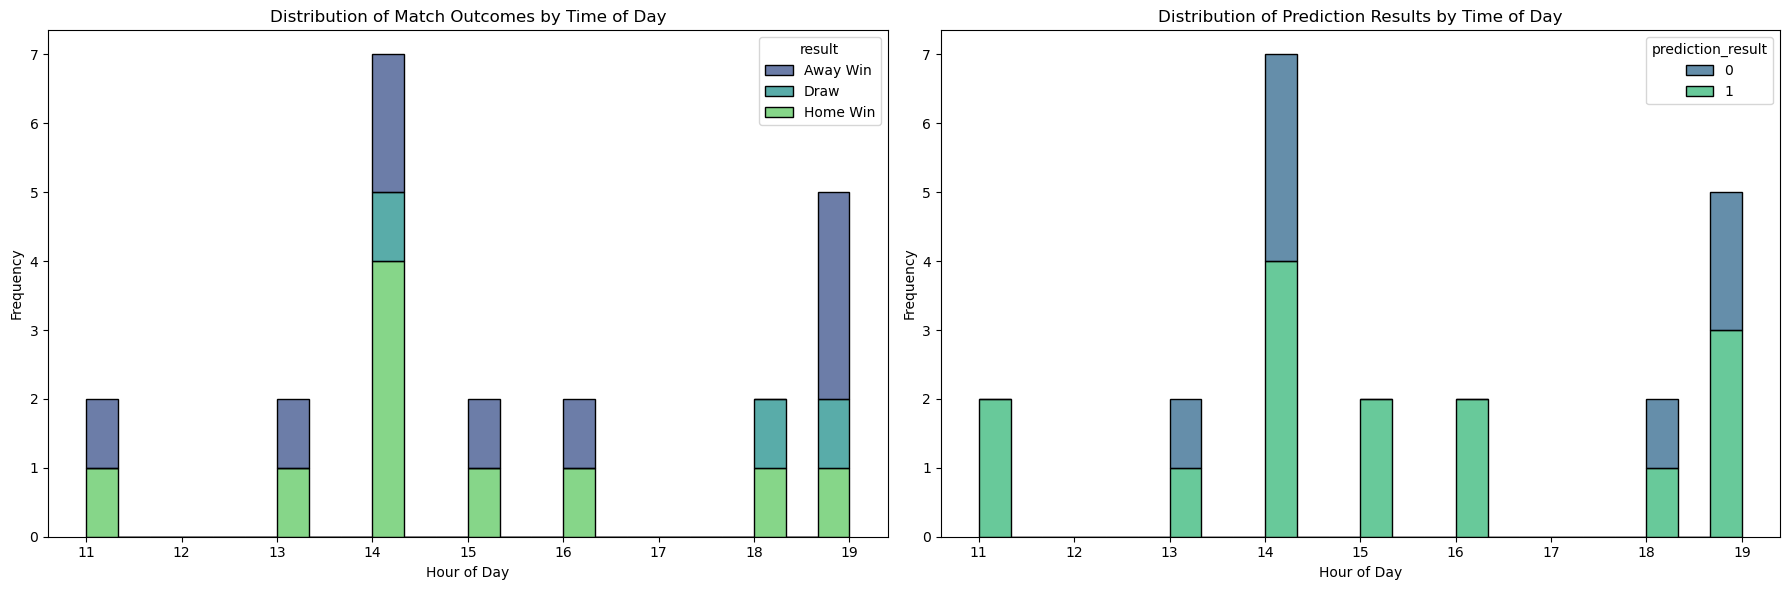

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to determine the match result based on highest probability
def result(row):
    if row['home_win_probability'] > row['draw_probability'] and row['home_win_probability'] > row['away_win_probability']:
        return 'Home Win'
    elif row['draw_probability'] > row['home_win_probability'] and row['draw_probability'] > row['away_win_probability']:
        return 'Draw'
    else:
        return 'Away Win'

# Create a new column 'result' based on the highest probability
training_data['result'] = training_data.apply(result, axis=1)

# Plot the distribution of match outcomes by time
plt.figure(figsize=(18, 6))

# Subplot 1: Distribution of match outcomes by time
plt.subplot(1, 2, 1)
sns.histplot(data=training_data, x='hour', hue='result', multiple='stack', bins=24, palette='viridis')
plt.title('Distribution of Match Outcomes by Time of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Frequency')

# Subplot 2: Distribution of prediction results by time
plt.subplot(1, 2, 2)
sns.histplot(data=training_data, x='hour', hue='prediction_result', multiple='stack', bins=24, palette='viridis')
plt.title('Distribution of Prediction Results by Time of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


C:\Users\kevin\anaconda3\envs\Alx_DataScience_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kevin\anaconda3\envs\Alx_DataScience_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kevin\anaconda3\envs\Alx_DataScience_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kevin\anaconda3\envs\Alx_DataScience_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na opti

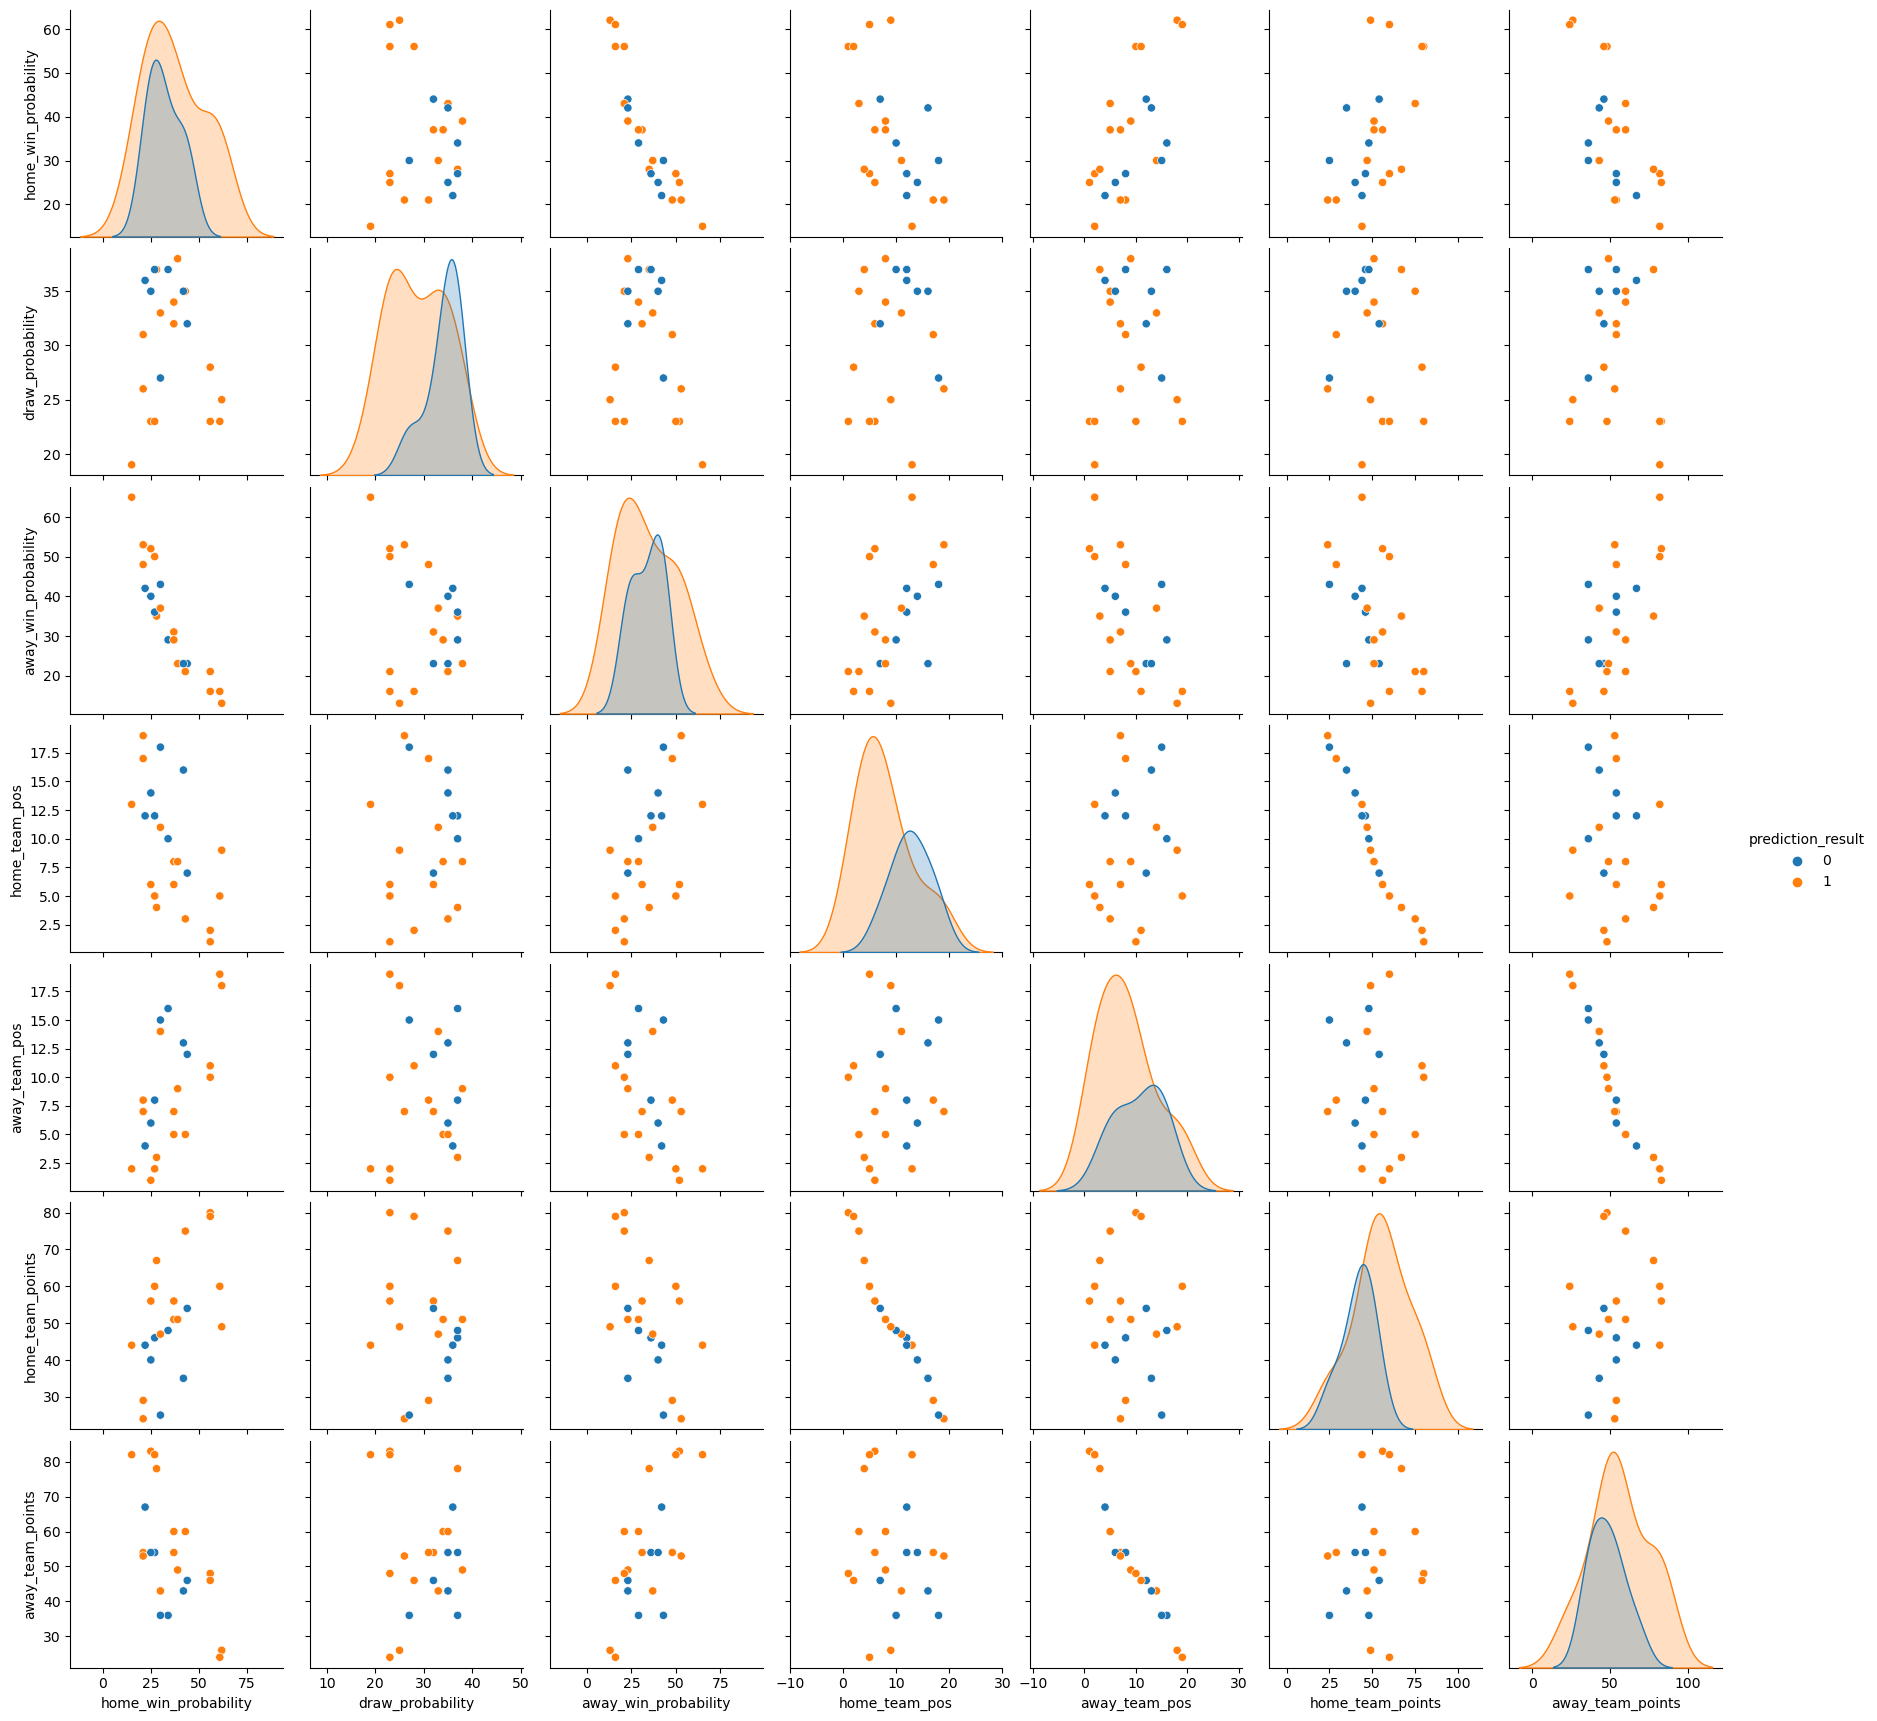

In [15]:
# Pair plot for selected features
pairplot_features = ['home_win_probability', 'draw_probability', 'away_win_probability', 
                     'home_team_pos', 'away_team_pos', 'home_team_points', 'away_team_points']

sns.pairplot(training_data[pairplot_features + ['prediction_result']], hue='prediction_result', diag_kind='kde')
plt.show()

C:\Users\kevin\anaconda3\envs\Alx_DataScience_env\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


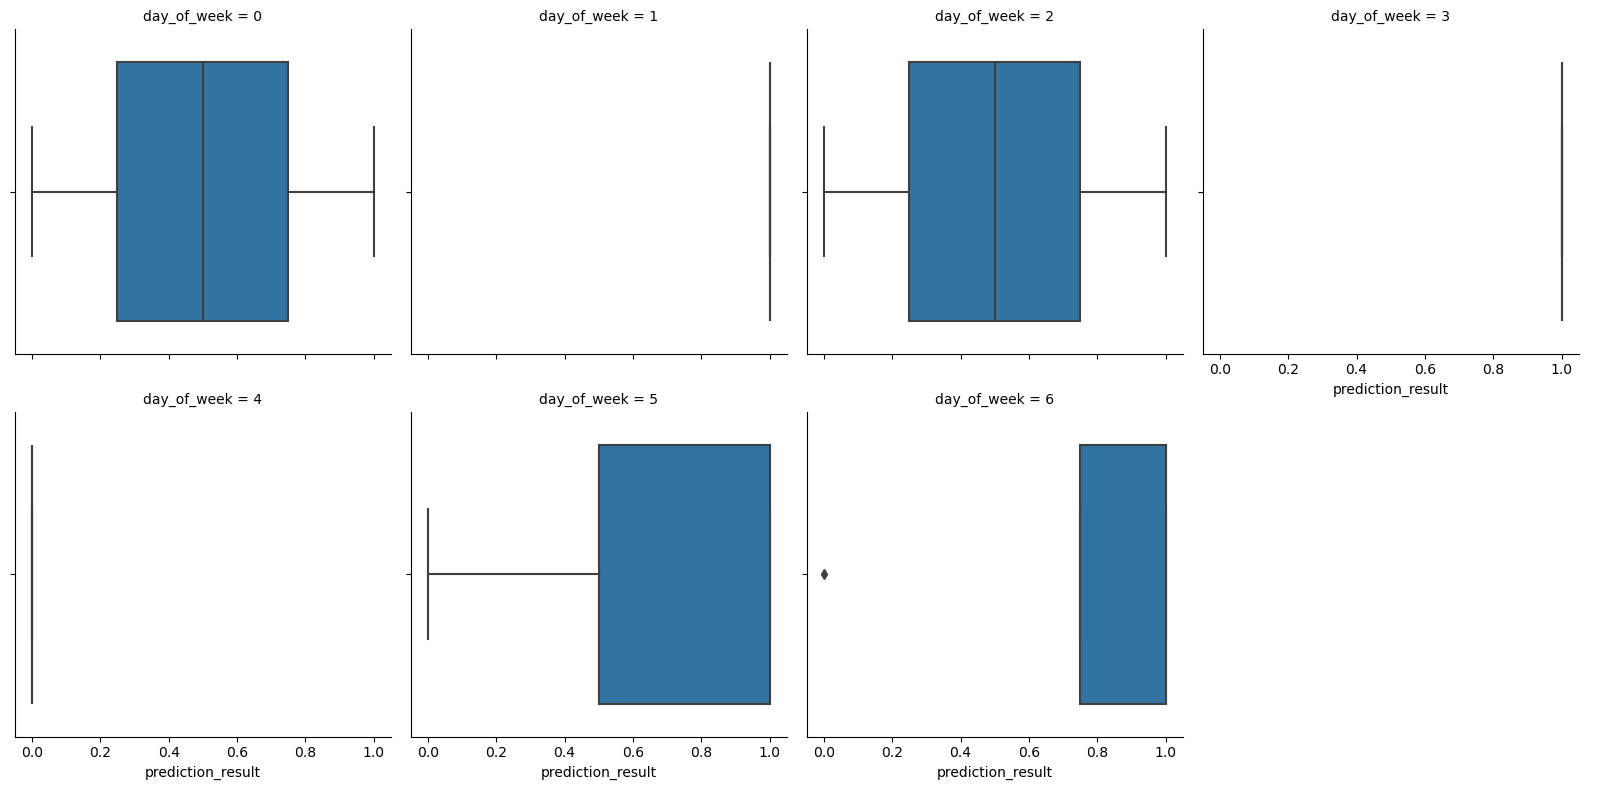

In [17]:
# Facet Grid for day_of_week vs prediction_result
g = sns.FacetGrid(training_data, col="day_of_week", col_wrap=4, height=4)
g.map(sns.boxplot, "prediction_result")
g.add_legend()
plt.show()

C:\Users\kevin\anaconda3\envs\Alx_DataScience_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kevin\anaconda3\envs\Alx_DataScience_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1200x800 with 0 Axes>

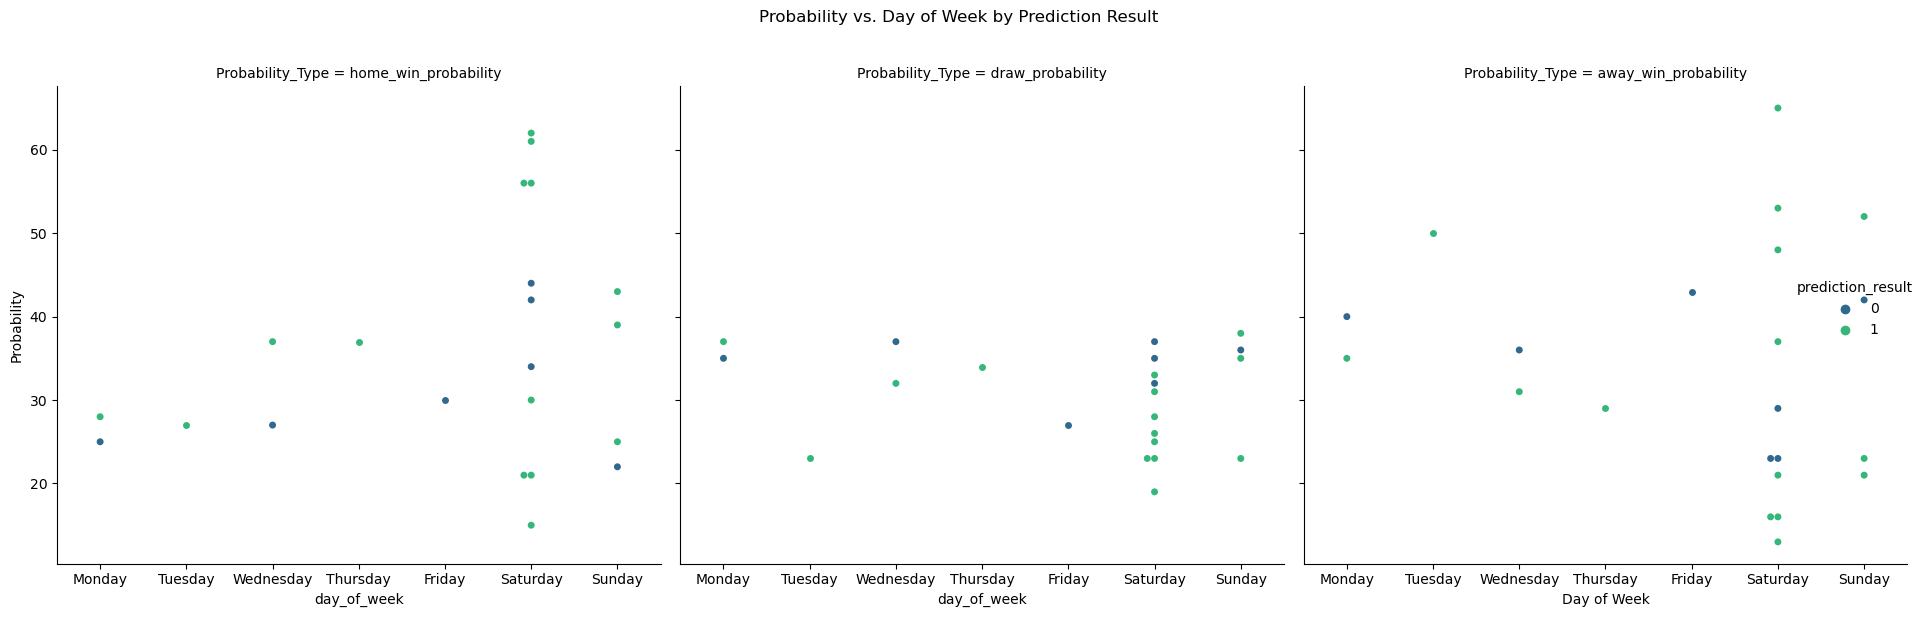

In [44]:
plt.figure(figsize=(12, 8))
sns.catplot(data=plot_data, x='day_of_week', y='Probability', hue='prediction_result',
                col='Probability_Type', kind='swarm', palette='viridis', height=6, aspect=1)
plt.suptitle('Probability vs. Day of Week by Prediction Result', y=1.02)
plt.xlabel('Day of Week')
plt.ylabel('Probability')
plt.xticks(ticks=range(7), labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.tight_layout()
plt.show()


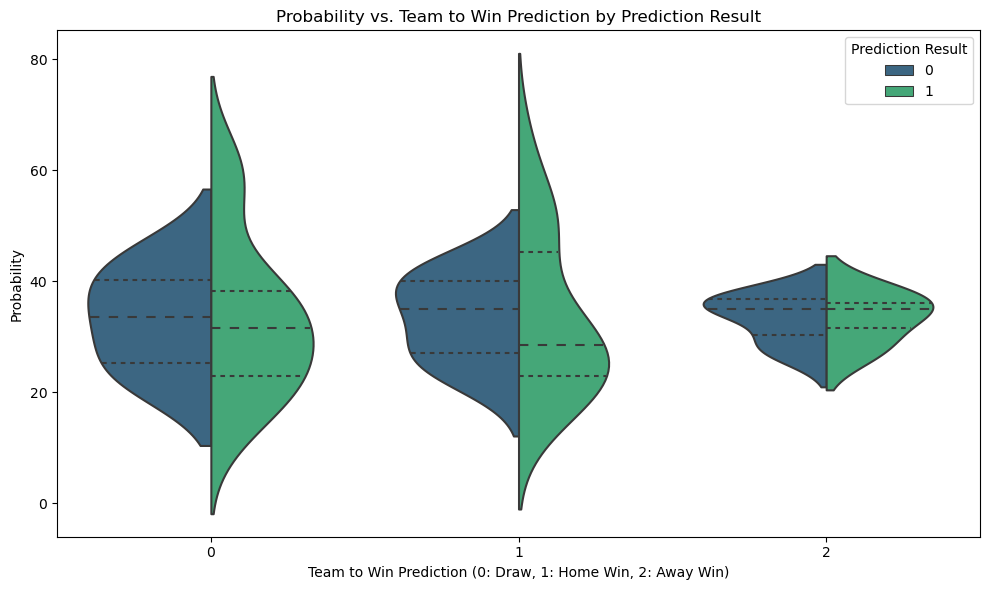

In [43]:
# Combine the probabilities into a single DataFrame
probabilities = pd.melt(training_data, id_vars=['team_to_win_prediction', 'prediction_result'], 
                        value_vars=['home_win_probability', 'draw_probability', 'away_win_probability'], 
                        var_name='Probability_Type', value_name='Probability')

# Plot the violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=probabilities, x='team_to_win_prediction', y='Probability', hue='prediction_result', 
               split=True, inner='quartile', palette='viridis')
plt.title('Probability vs. Team to Win Prediction by Prediction Result')
plt.xlabel('Team to Win Prediction (0: Draw, 1: Home Win, 2: Away Win)')
plt.ylabel('Probability')
plt.legend(title='Prediction Result')
plt.tight_layout()
plt.show()


### Conclsuion

The visualizations presented here provide some insights into the relationship between various factors such as day of the week, probabilities, and prediction results in predicting match outcomes. However, it's important to note that due to the limited amount of data available, the conclusions drawn from these diagrams may not be entirely definitive.

Some of the visualizations may appear redundant or inconclusive due to the lack of sufficient data. Nevertheless, as more data is accumulated, it is expected that the analysis will become more robust and insightful, leading to clearer conclusions about the factors influencing match predictions.

Moving forward, with the start of the next season and the accumulation of more data, a more definitive and comprehensive analysis can be conducted, providing deeper insights into the dynamics of match prediction and the reliability of betting site tips.


#### Note to self
With additional data, my plan is to pick certain teams and over time, see how their odds increase or decrease and like stocks know when to bet on them or not
Focus more on draws(high value bets). look at probabilities and results
look at middle league teams
visualize data or scoring frequency
I cant wait for next season!